In [38]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data.drop(data.columns[2:], axis=1)
data = data.rename(columns={"v1": "label", "v2": "text"})
data['label'] = data['label'].map({'spam': 1, 'ham': 0})
data.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Tokenization, removing stop words, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercase conversion
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
data['text'] = data['text'].apply(preprocess_text)

# Display the preprocessed data
data.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [11]:
data['text'].describe().to_frame()

,text
count,5572
unique,5034
top,sorry call later
freq,30


# **to see which text entries occur more frequently than others.**

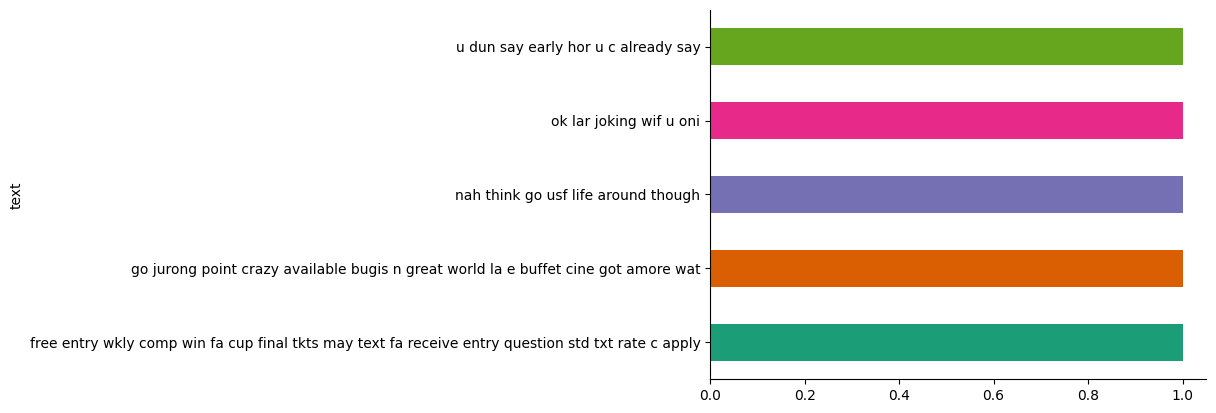

In [9]:
df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **showing the frequency of each unique value in the "label" column**

<Axes: xlabel='label', ylabel='count'>

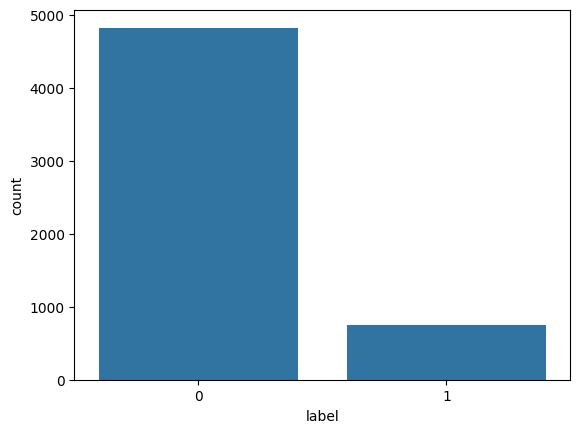

In [14]:
sns.barplot(x=data["label"].value_counts().index, y=data["label"].value_counts())


In [21]:
X = data["text"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4457,)
Shape of X_test: (1115,)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


# **to convert the raw text data into a matrix of token counts**

In [22]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# **TF-IDF transformation of the text data**

In [24]:
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

In [27]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)
print(f"Support Vector Machine Model Accuracy: {svm_score:0.1%}")

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_score = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy: {logistic_score:0.1%}")

Support Vector Machine Model Accuracy: 97.0%
Logistic Regression Model Accuracy: 94.4%


In [28]:
# Predictions
logistic_predictions = logistic_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

In [29]:
# Confusion Matrix
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

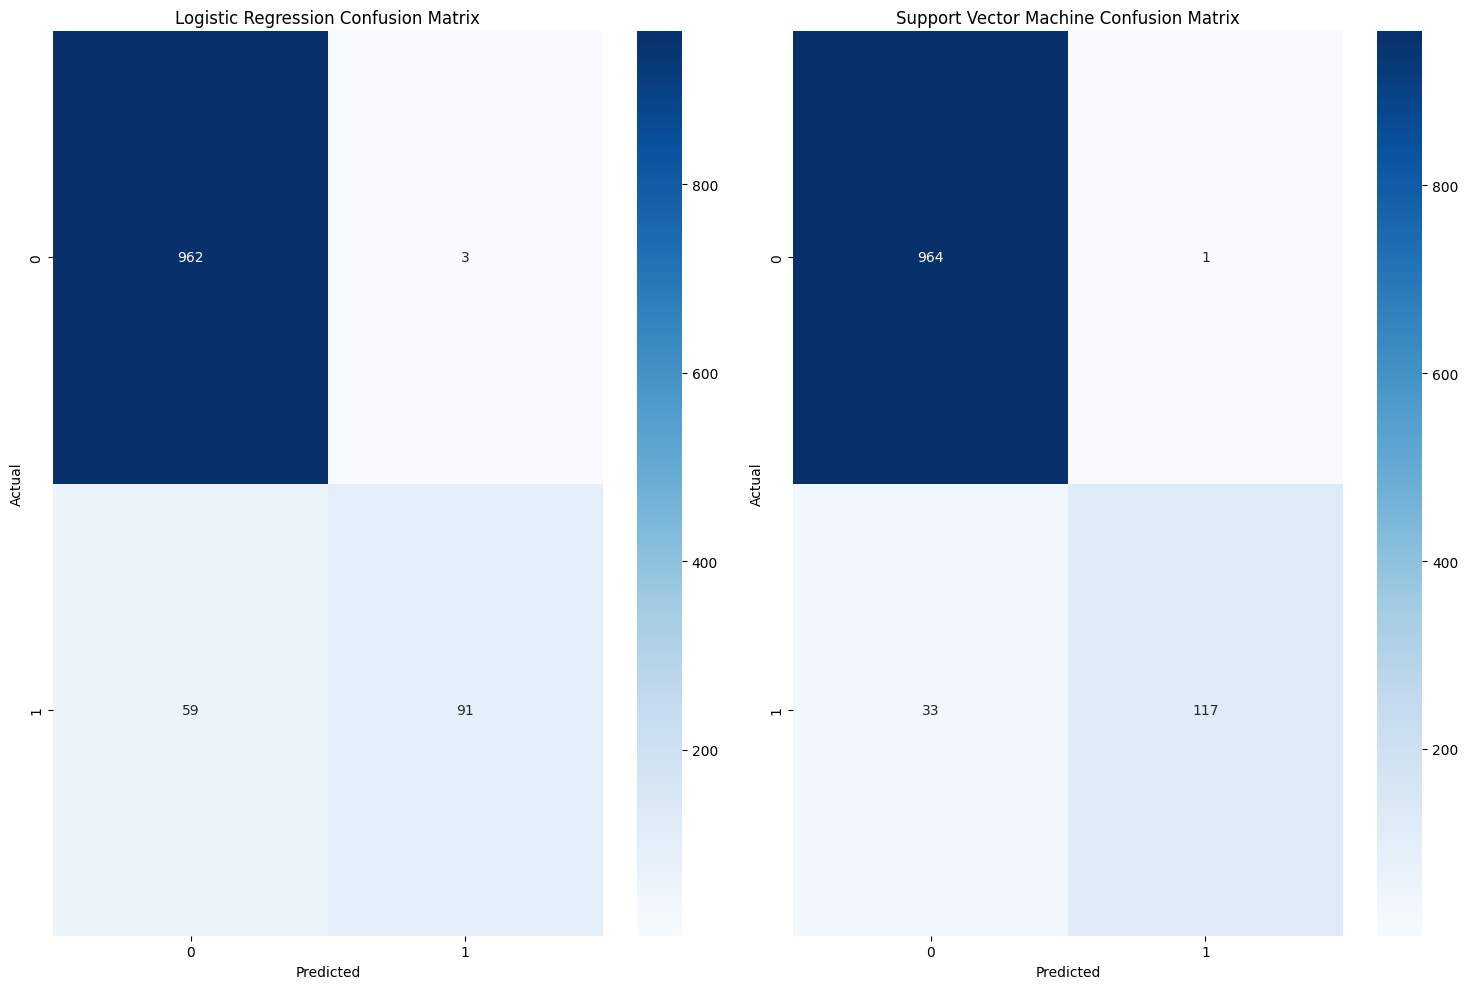

In [36]:
# Create a figure with a specific size
plt.figure(figsize=(15, 10))
# Define the number of rows and columns for subplots
rows = 1
columns = 2
# Plotting Logistic Regression Confusion Matrix
plt.subplot(rows, columns, 1)
sns.heatmap(logistic_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting Support Vector Machine Confusion Matrix
plt.subplot(rows, columns, 2)
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Automatically adjust subplot layout
plt.tight_layout()
# Show the plot
plt.show()

In [42]:
# Evaluate logistic regression model
print("Logistic Regression:")
print(classification_report(y_test, logistic_predictions))

# Evaluate support vector machine model
print("Support Vector Machine:")
print(classification_report(y_test, svm_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

